# Throughput

This report investigates the efficiency of each ESIS optical component
and estimates the total sensitivity of the optics (not including the sensor).

In [1]:
import matplotlib.pyplot as plt
import astropy.visualization
import astropy.units as u
import named_arrays as na
import esis

Load the optical design

In [2]:
instrument = esis.flights.f1.optics.design_single(num_distribution=0)
instrument.wavelength = na.linspace(-1, 1, axis="wavelength", num=11)

Trace rays through the optical design

In [3]:
rays = instrument.system.raytrace().outputs

self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    nominal=ScalarArray(
        ndarray=6.94716053 ,
        axes=(),
    ),
    distribution=ScalarArray(
        ndarray=[] ,
        axes=('_distribution',),
    ),
)


C:\Users\byrdie\AppData\Local\Programs\Python\Python311\Lib\site-packages\astropy\units\quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    nominal=ScalarArray(
        ndarray=6.94716053 ,
        axes=(),
    ),
    distribution=ScalarArray(
        ndarray=[] ,
        axes=('_distribution',),
    ),
)
self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    nominal=ScalarArray(
        ndarray=6.94716053 ,
        axes=(),
    ),
    distribution=ScalarArray(
        ndarray=[] ,
        axes=('_distribution',),
    ),
)
self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    nominal=ScalarArray(
        ndarray=6.94716053 ,
        axes=(),
    ),
    distribution=ScalarArray(
        ndarray=[] ,
        axes=('_distribution',),
    ),
)
self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    nominal=ScalarArray(
        ndarray=6.94716053 ,
        axes=(),
    ),
    distribution=ScalarArray(
        ndarray=[] ,
        axes=('_distribution',),
    ),
)
self.name='grating'
np.mean(efficiency)=UncertainScalarArray(
    no

Create a list with the names of each surface

In [4]:
surface_names = [s.name for s in instrument.system.surfaces_all]

Isolate the name of the logical axis indicating different surfaces

In [5]:
axis_surface = instrument.system.axis_surface

Compute the index of each surface

In [7]:
index_source = 0
index_primary = surface_names.index(instrument.primary_mirror.surface.name)
index_grating = surface_names.index(instrument.grating.surface.name)
index_filter = surface_names.index(instrument.filter.surface.name)

Compute the intensity of the rays at each surface

In [8]:
axis_sum = instrument.field.axes + instrument.pupil.axes
intensity_source = rays.intensity[{axis_surface: index_source}].sum(axis_sum)
intensity_primary = rays.intensity[{axis_surface: index_primary}].sum(axis_sum)
intensity_grating = rays.intensity[{axis_surface: index_grating}].sum(axis_sum)
intensity_filter = rays.intensity[{axis_surface: index_filter}].sum(axis_sum)

Compute the efficiency of each surface by taking intensity ratios

In [9]:
efficiency_primary = intensity_primary / intensity_source
efficiency_grating = intensity_grating / intensity_primary
efficiency_filter = intensity_filter / intensity_grating
efficiency_total = intensity_filter / intensity_source

Plot the efficiencies as a function of wavelength.

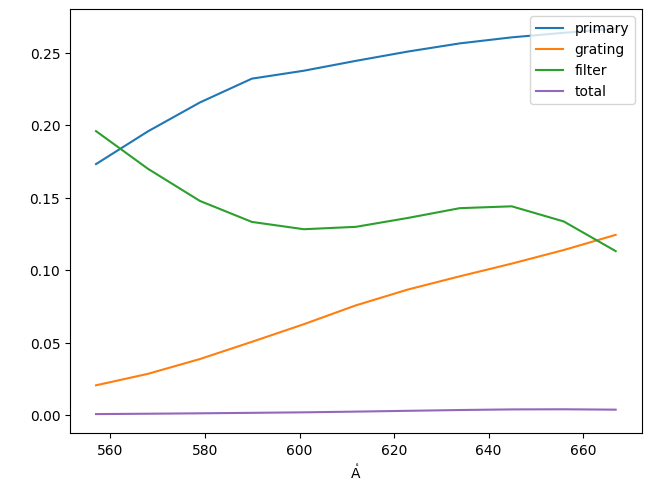

In [16]:
with astropy.visualization.quantity_support():
    fig, ax = plt.subplots(constrained_layout=True)
    na.plt.plot(
        instrument.wavelength_physical,
        efficiency_primary,
        ax=ax,
        label=instrument.primary_mirror.surface.name,
        color="tab:blue",
    )
    na.plt.plot(
        instrument.wavelength_physical,
        efficiency_grating,
        ax=ax,
        label=instrument.grating.surface.name,
        color="tab:orange",
    )
    na.plt.plot(
        instrument.wavelength_physical,
        efficiency_filter,
        ax=ax,
        label=instrument.filter.surface.name,
        color="tab:green",
    )
    na.plt.plot(
        instrument.wavelength_physical,
        efficiency_total,
        ax=ax,
        label="total",
        color="tab:purple",
    )
    ax.legend(loc="upper right")

Plot a schematic of the three multilayer stacks to compare

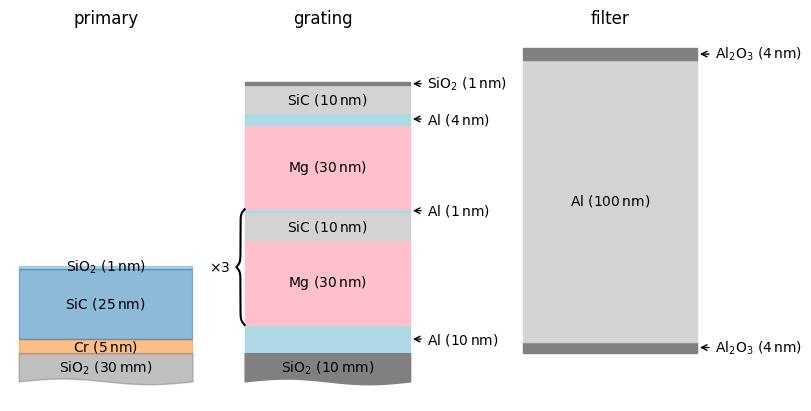

In [19]:
with astropy.visualization.quantity_support():
    fig, ax = plt.subplots(
        ncols=3,
        sharey=True,
        figsize=(8,4),
        constrained_layout=True,
    )
    instrument.primary_mirror.material.plot_layers(ax=ax[0])
    instrument.grating.material.plot_layers(ax=ax[1])
    instrument.filter.material.plot_layers(ax=ax[2])
    ax[0].set_title(instrument.primary_mirror.surface.name)
    ax[1].set_title(instrument.grating.surface.name)
    ax[2].set_title(instrument.filter.surface.name)
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
    ax[2].autoscale()

The total efficiency of the optics at the target wavelength is

In [23]:
efficiency_total.nominal.ndarray.max()

<Quantity 0.00401311>